In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import math

pesca = pd.read_csv('pesca.csv', sep=',', decimal='.')
pesca

,giorno.settimana,peso.pescato,settore.di.pesca,settore.num,forza.del.mare,tempesta
0,1,5.168068,A,1,7,1
1,1,4.074747,A,1,7,1
2,1,7.358404,A,1,5,1
3,1,5.022524,A,1,5,1
4,1,5.826922,A,1,5,1
...,...,...,...,...,...,...
250,5,13.314936,I,9,5,1
251,5,17.445849,I,9,3,0
252,5,19.351561,I,9,1,0
253,5,17.939520,I,9,1,0


In [12]:
#ESERCIZIO 2

In [14]:
#2.1 Quante sono le giornate lavorative in una settimana al mercato del pesce?
len(pesca['giorno.settimana'].unique())

5

In [15]:
#2.2 Per quanti giorni sono state raccolte le informazioni?
len(pesca)

255

In [24]:
'''2.3 Quante volte si è pescato in condizioni di tempesta? Dare una risposta 
in termini di frequenza sia assoluta, sia relativa.
'''
print("frequenza assoluta: ")
print(len(pesca[pesca['tempesta'] == 1]))
print("frequenza relativa: ")
print(len(pesca[pesca['tempesta'] == 1])/len(pesca))


frequenza assoluta: 
94
frequenza relativa: 
0.3686274509803922


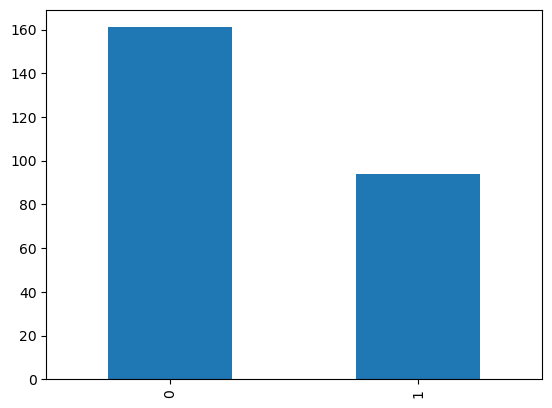

In [25]:
#2.4 Tracciare un grafico rappresentativo della frequenza di tempesta.
pesca['tempesta'].value_counts().plot.bar()
plt.show()

In [26]:
#2.5 Quanti sono i settori di pesca della parte di mare considerata?
len(pesca['settore.di.pesca'].unique())

9

In [27]:
#2.6 Qual è la frequenza relativa del settore "A"?
print("frequenza relativa: ", len(pesca[pesca['settore.di.pesca'] == "A"])/len(pesca))

frequenza relativa:  0.1450980392156863


In [29]:
#2.7 Produrre la tabella delle frequenze congiunte tra settore.di.pesca e tempesta
settore_tempesta = pd.crosstab(index=pesca['settore.di.pesca'],
                              columns = pesca['tempesta'])
settore_tempesta

tempesta,0,1
settore.di.pesca,,
A,24,13
B,28,24
C,19,14
D,3,2
E,24,16
F,5,3
G,20,11
H,8,1
I,30,10


In [32]:
'''
2.8 Utilizzare la tabella delle frequenze congiunte per stabilire, relativamente al
settore di pesca "A", quanti sono stati i giorni di tempesta e quanti quelli
senza tempesta.
'''
settore_tempesta.loc['A', 1]

13

In [33]:
'''
Supponiamo, d’ora in poi, che sia verificata la condizione (realistica forse
soltanto per alcune zone del pianeta) che le condizioni atmosferiche di un
dato giorno siano indipendenti dalle condizioni atmosferiche di un altro
giorno.
'''

'\nSupponiamo, d’ora in poi, che sia verificata la condizione (realistica forse\nsoltanto per alcune zone del pianeta) che le condizioni atmosferiche di un\ndato giorno siano indipendenti dalle condizioni atmosferiche di un altro\ngiorno.\n'

In [45]:
#2.9 Sulla base dei dati a disposizione stimare la probabilità pT che oggi ci sia tempesta
pT = pesca['tempesta'].mean()
pT

0.3686274509803922

In [36]:
#2.10 Qual è la taglia del campione che avete utilizzato nella stima di pT ?
len(pesca)

255

In [47]:
#2.11 Stimare la probabilità pTA che ci sia tempesta nel settore "A".
sA = pesca[pesca['settore.di.pesca'] == 'A']
pTA = sA['tempesta'].mean()
pTA

0.35135135135135137

In [48]:
'''
2.12 Un pescatore dice che ieri ha incontrato condizioni di tempesta. Qual è la
probabilità che abbia lavorato nel settore di pesca "A"?
'''
sA['tempesta'].mean()/pesca['tempesta'].mean()

0.9531339850488787

In [49]:
'''
2.13 Qual è la taglia nA del campione che avete utilizzato al punto 11. per la
stima della probabilità che ci sia tempesta nel settore "A"?
'''
len(sA)

37

In [51]:
'''
2.14 Si determini un limite inferiore per la probabilità di aver compiuto, nella
stima di pTA, un errore, in eccesso o in difetto, minore o uguale di 0.1.
'''
1 - (sA['tempesta'].var())/(37*(0.1)**2)

0.36693450206963685

In [52]:
#ESERCIZIO 3

In [54]:
#3.1 Il carattere peso.pescato è discreto o continuo?
pesca['peso.pescato']
print('peso pescato è continuo')

peso pescato è continuo


essendo peso.pescato continuo, il grafico adatto per la sua distribuzione è l'istogramma


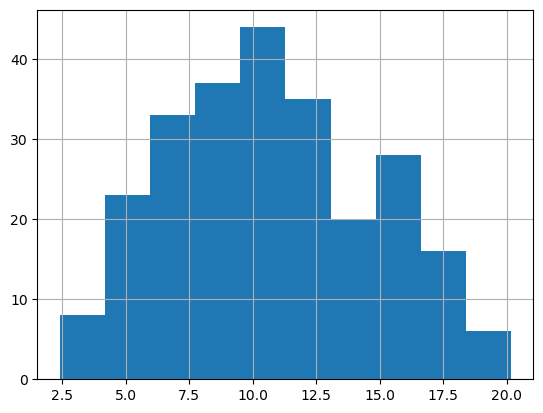

In [56]:
#3.2 Si tracci il grafico che meglio rappresenta la distribuione del peso.pescato.
print("essendo peso.pescato continuo, il grafico adatto per la sua distribuzione è l'istogramma")
pesca['peso.pescato'].hist()
plt.show()

In [60]:
'''
3.3 Calcolare la percentuale di giorni in cui al mercato è arrivata una quantità
di pescato compresa tra i 10 e i 15 quintali.
'''
pesca_10 = pesca[pesca['peso.pescato'] > 10]
pesca_15 = pesca_10[pesca_10['peso.pescato'] < 15]
(len(pesca_15)/len(pesca))*100

37.64705882352941

In [63]:
'''
3.4 Determinare i parametri della variabile casuale normale che potrebbe descrivere
il peso.pescato.
'''

mu = pesca['peso.pescato'].mean()
sigma = pesca['peso.pescato'].var()

print('i parametri di una normale sono valore atteso e dev. standard, per cui\n', mu, sigma)

i parametri di una normale sono valore atteso e dev. standard, per cui
 10.788632531936003 16.09024449815005


In [70]:
'''
3.5 Secondo il modello identificato al punto precedente, calcolare la probabilità
che al mercato arrivi giornalmente una quantità di pescato compresa tra i
10 e i 15 quintali.
'''
Z = st.norm(mu, math.sqrt(sigma))
Z.cdf(15) - Z.cdf(10)

0.4310460131061047

In [71]:
'''
3.6 Si possono confrontare le risposte dei punti 3. e 5.?
'''
print('si perchè quella del punto 3.5 è una approssimazione')

si perchè quella del punto 3.5 è una approssimazione


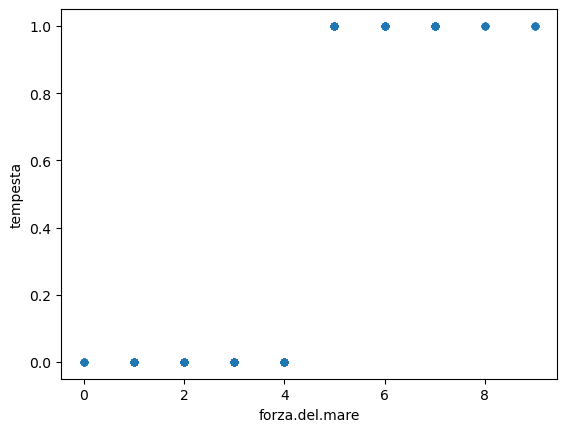

lo scatter plot evidenza una relazione di tipo diretto tra i due attributi
0.8412359096077456 l indice di correlazione campionaria
vicino ad 1 conferma tale ipotesi


In [80]:
'''
3.8 Prendiamo in considerazione i caratteri forza.del.mare e tempesta. Tracciare
un grafico opportuno per poter individuare l’esistenza di una relazione tra
i due caratteri.
'''
pesca.plot.scatter('forza.del.mare','tempesta')
plt.show()
print('lo scatter plot evidenza una relazione di tipo diretto tra i due attributi')
print(pesca['forza.del.mare'].corr(pesca['tempesta']), 'l indice di correlazione campionaria\nvicino ad 1 conferma tale ipotesi')

In [87]:
'''
3.11 In alcuni giorni non sono stati registrati valori per il carattere peso.pescato.
Create una nuova variabile, chiamata dati_senza_NA, in cui memorizzare
tutti i casi del dataset eccetto quelli che hanno il peso.pescato mancante e
calcolate, a partire da questo nuovo dataset, il coefficiente di variazione del
peso.pescato.
'''
dati_senza_NA = pesca.dropna()
dati_senza_NA['peso.pescato'].std()/ dati_senza_NA['peso.pescato'].mean()

0.37180473880354103